# Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset 

In [2]:
df_train = pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')
df_train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
207,LP001698,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.0,Rural,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
108,LP001379,Male,Yes,2,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban,N
323,LP002055,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
542,LP002753,Female,No,1,Graduate,NaN,3652,0.0,95.0,360.0,1.0,Semiurban,Y
187,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural,Y


In [3]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Tiền xử lý dữ liệu

In [6]:
def show_null(df):
    return df.isnull().sum()
print(show_null(df_train))
print("==========================")
print(show_null(df_test))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
def fill_null(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Kiểm tra nếu là kiểu categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
        elif pd.api.types.is_numeric_dtype(df[column]):  # Kiểm tra nếu là kiểu numerical
            df[column].fillna(df[column].mean(), inplace=True)
    return df
df_train = fill_null(df_train)
df_test = fill_null(df_test)
print(show_null(df_train))
print("==========================")
print(show_null(df_test))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


# EDA

## Biến phân loại

In [8]:
def plot_countplots(df_train, df_test, column_name):
    # Thiết lập khung hình với 1 hàng và 2 cột
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Biểu đồ countplot cho df_train
    sns.countplot(x=column_name, data=df_train, ax=axes[0])
    axes[0].set_title(f'Training Data - {column_name}')
    
    # Biểu đồ countplot cho df_test
    sns.countplot(x=column_name, data=df_test, ax=axes[1])
    axes[1].set_title(f'Test Data - {column_name}')
    
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

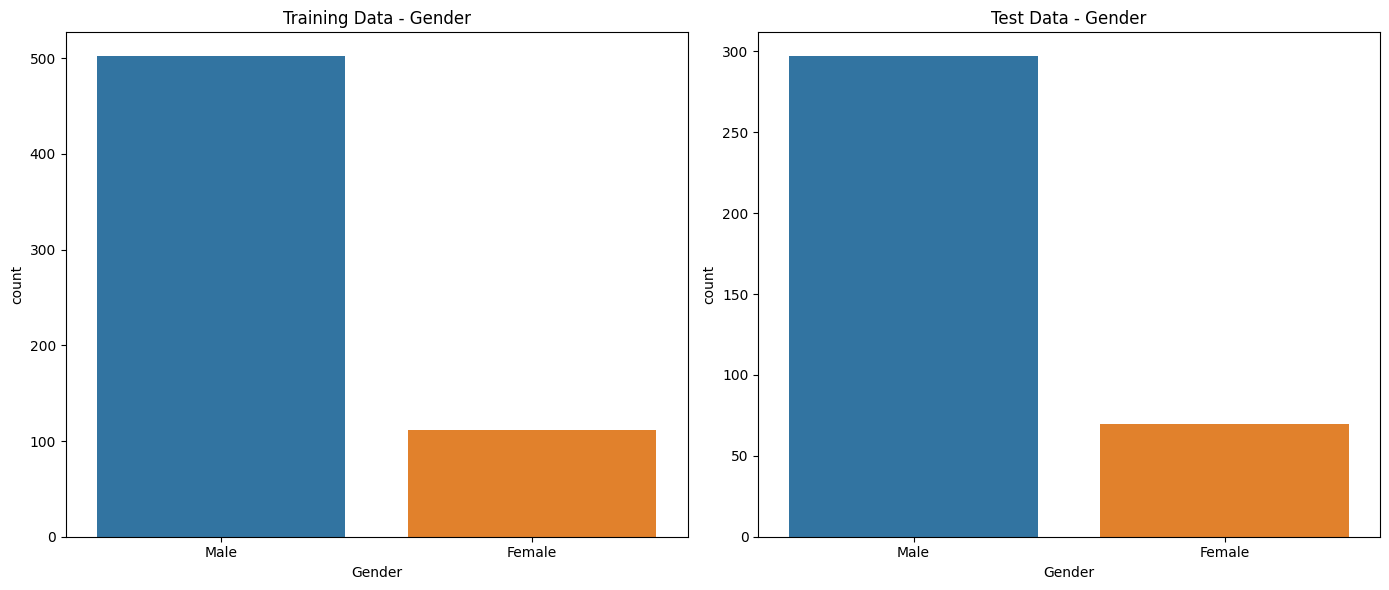

In [9]:
plot_countplots(df_train, df_test, 'Gender')

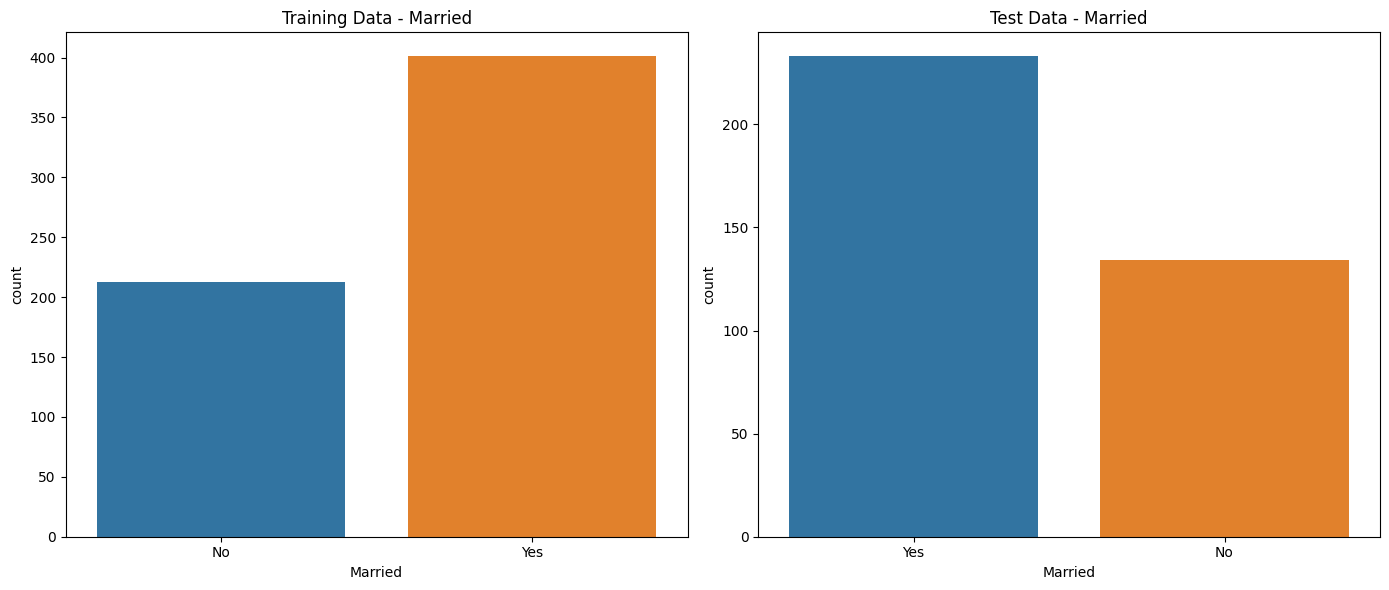

In [10]:
plot_countplots(df_train, df_test, 'Married')

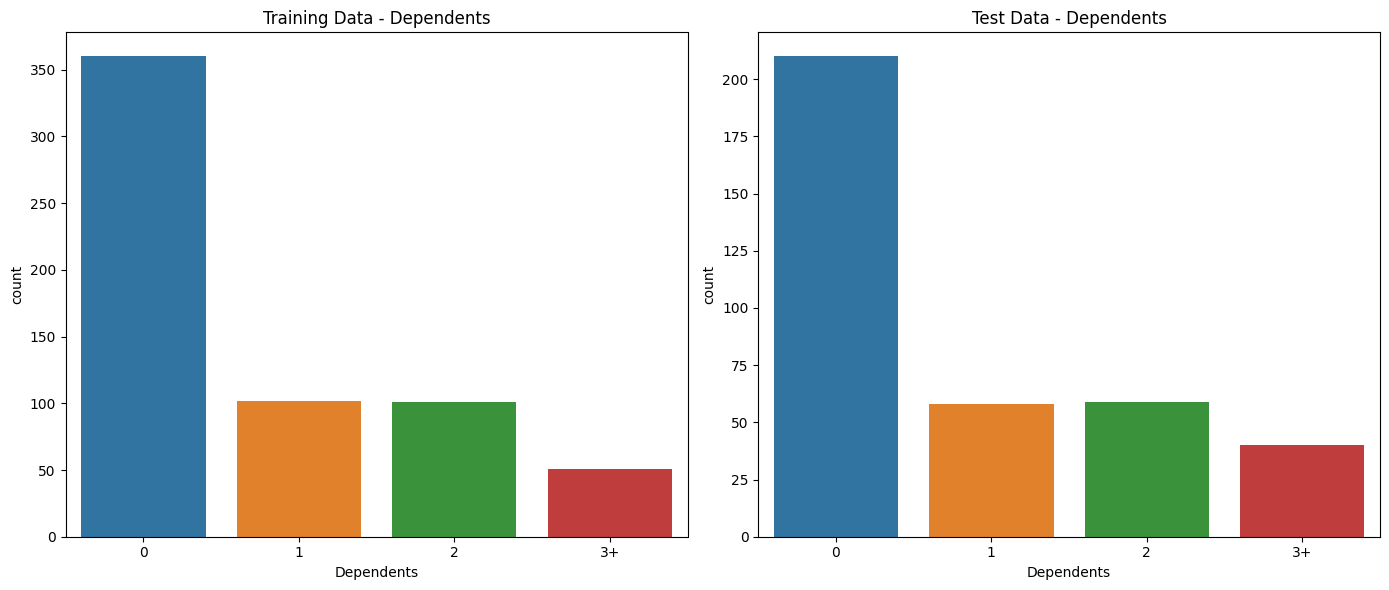

In [11]:
plot_countplots(df_train, df_test, 'Dependents')

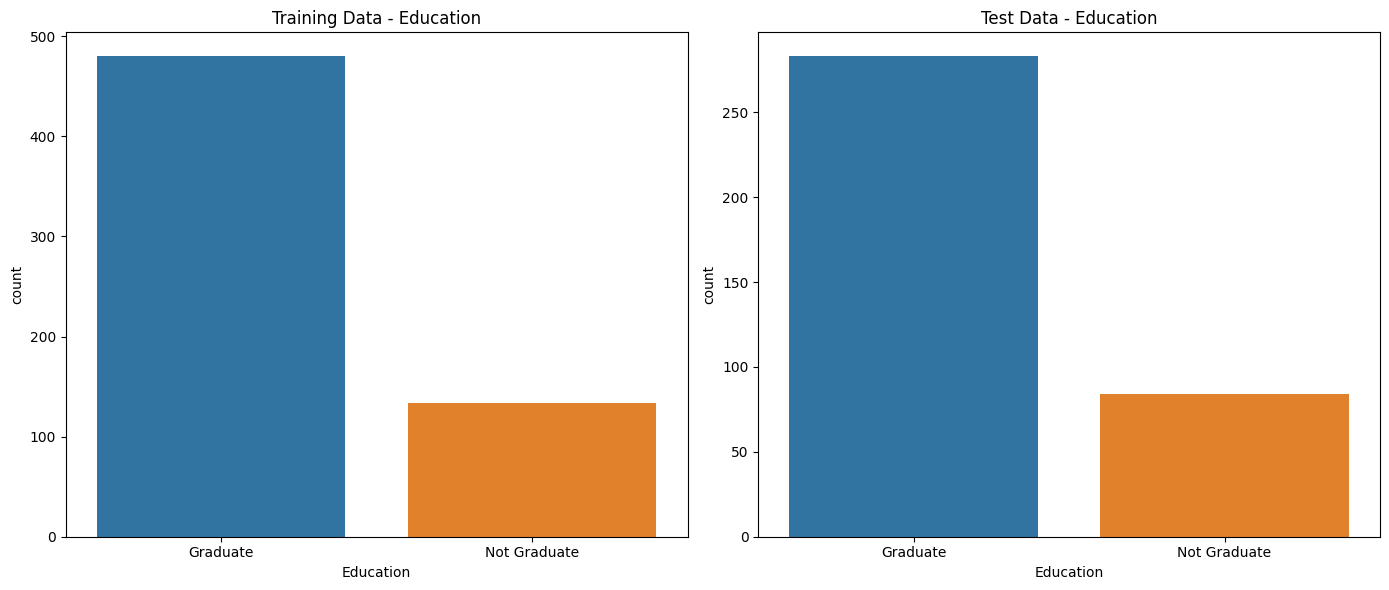

In [12]:
plot_countplots(df_train, df_test, 'Education')

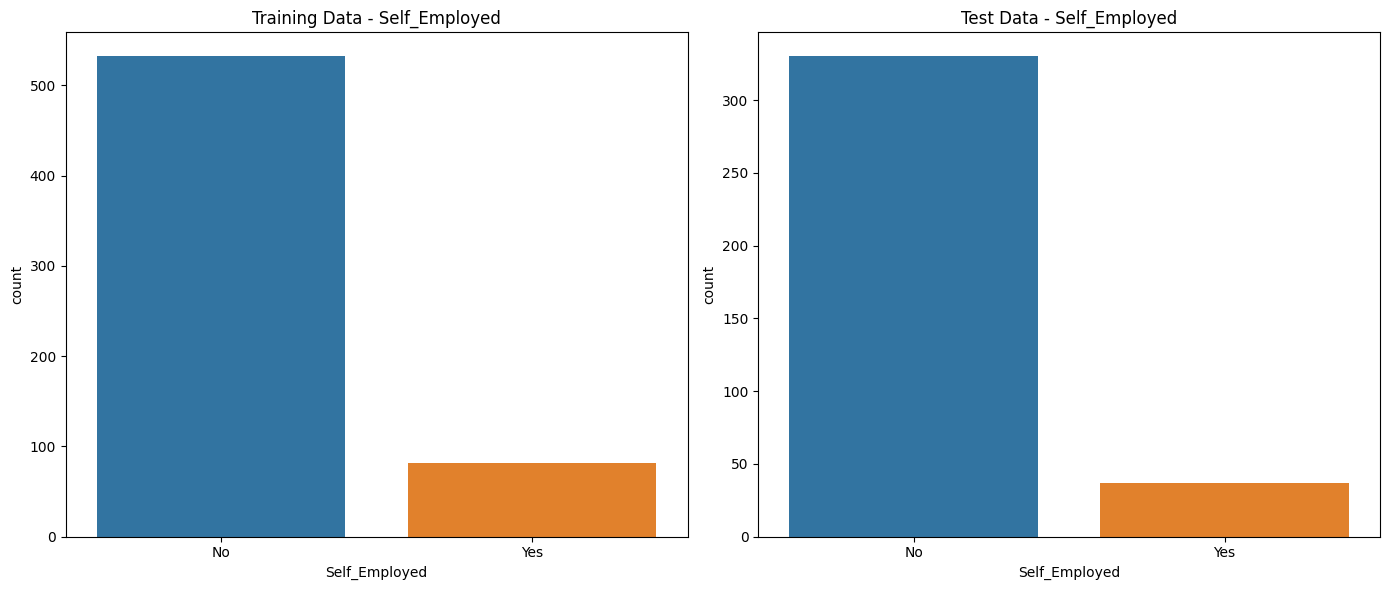

In [13]:
plot_countplots(df_train, df_test, 'Self_Employed')

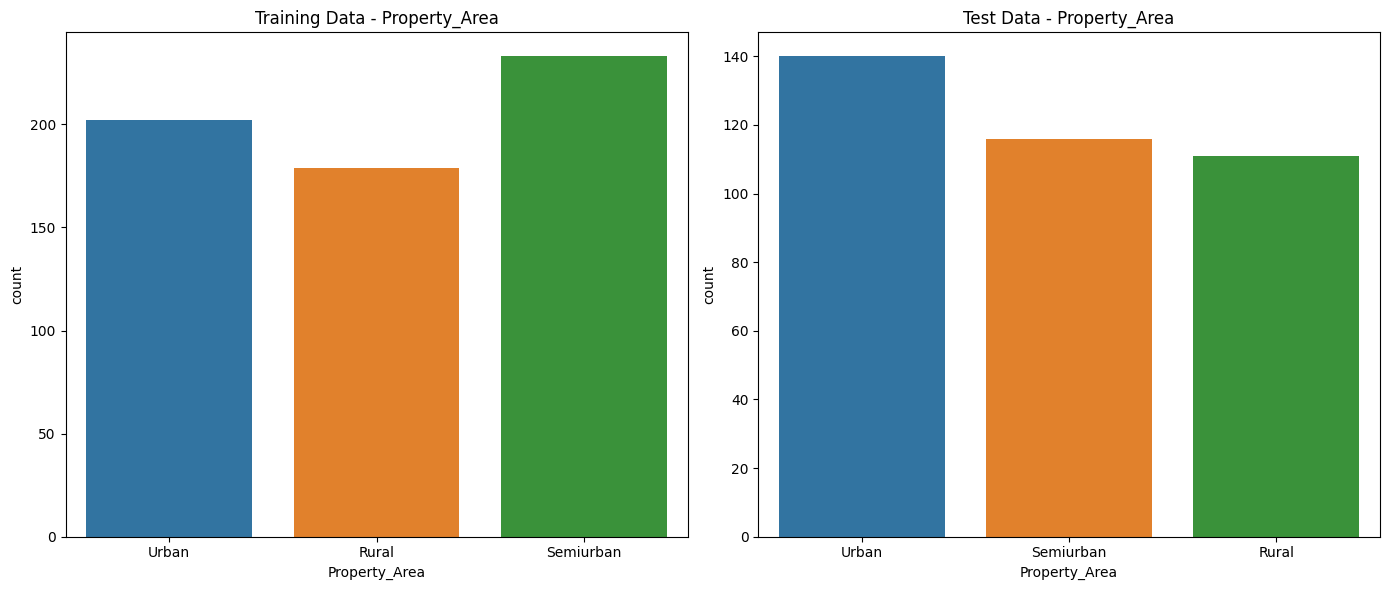

In [14]:
plot_countplots(df_train, df_test, 'Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

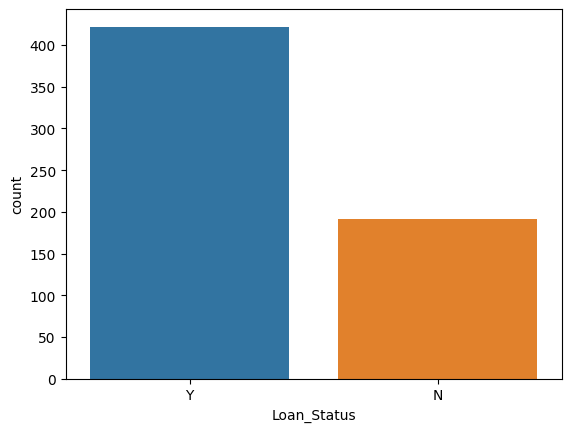

In [15]:
sns.countplot(x='Loan_Status', data=df_train)

## Numberical

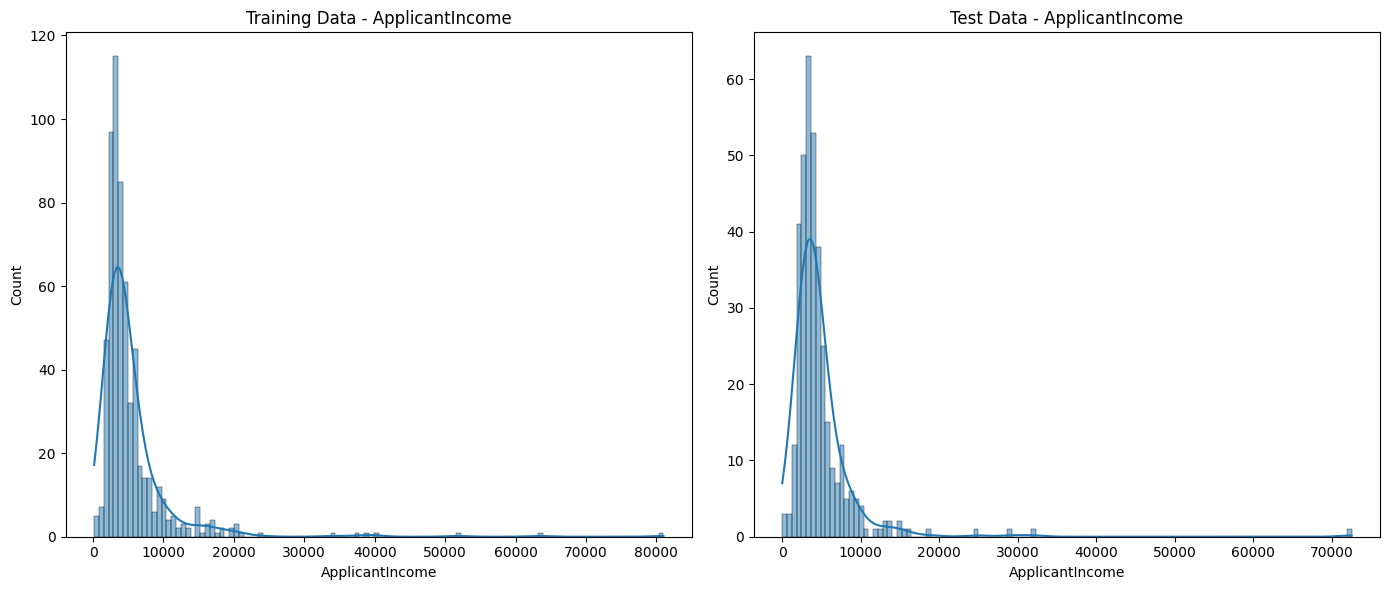

In [16]:
def plot_displot(_df_train, _df_test, column_name, with_log = False):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    __df_train = _df_train[column_name]
    __df_test = _df_test[column_name]
    
    if (with_log):
        __df_train = np.log(__df_train)
        __df_test = np.log(__df_test)
        
    # Biểu đồ phân phối cho df_train
    sns.histplot(__df_train, ax=axes[0], kde=True)
    axes[0].set_title(f'Training Data - {column_name}')
    
    # Biểu đồ phân phối cho df_test
    sns.histplot(__df_test, ax=axes[1], kde=True)
    axes[1].set_title(f'Test Data - {column_name}')
    
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

plot_displot(df_train, df_test, 'ApplicantIncome')

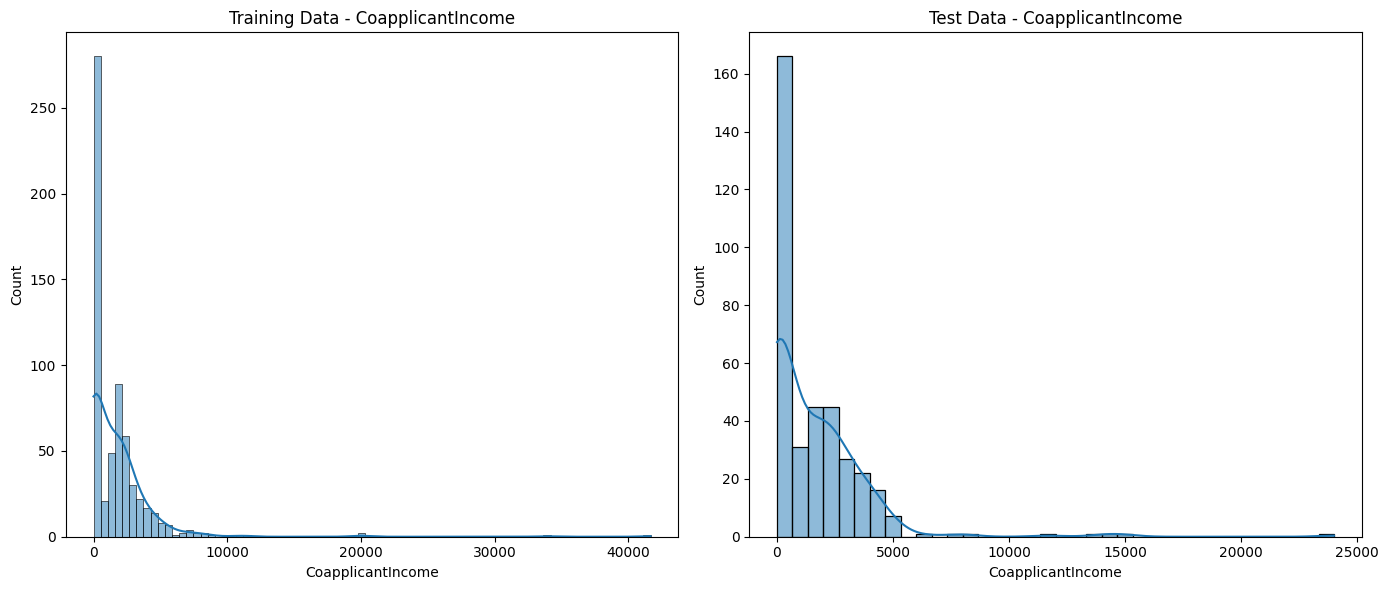

In [17]:
plot_displot(df_train, df_test, 'CoapplicantIncome')

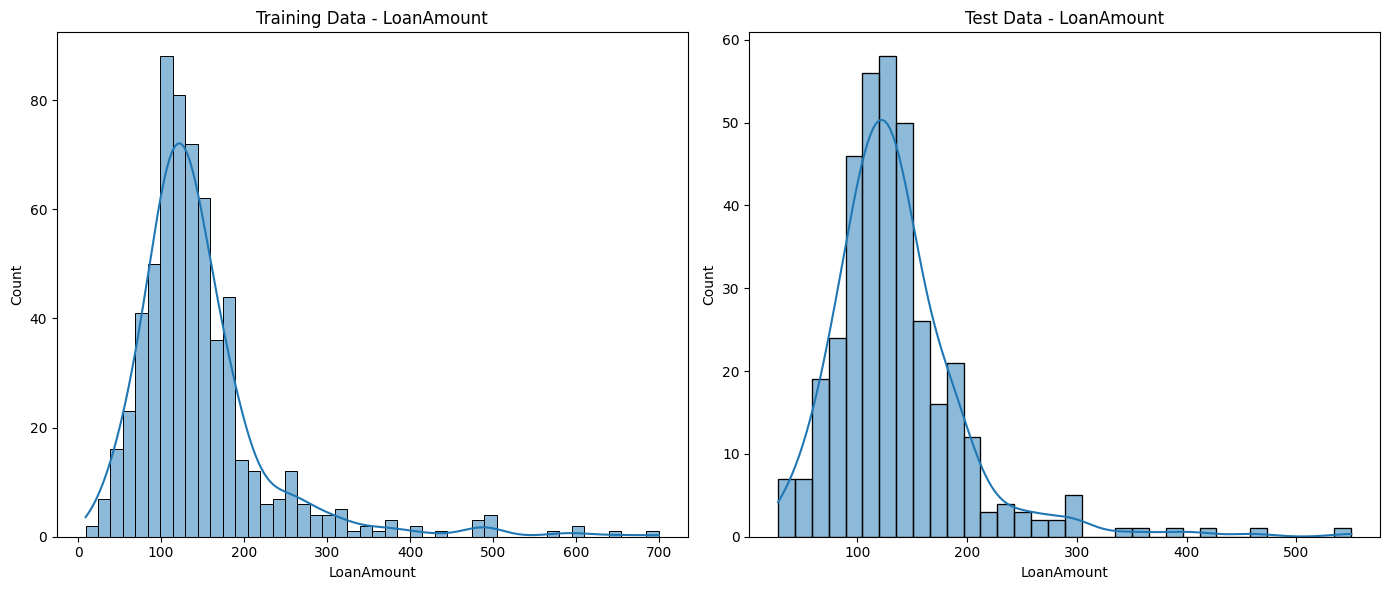

In [18]:
plot_displot(df_train, df_test, 'LoanAmount')

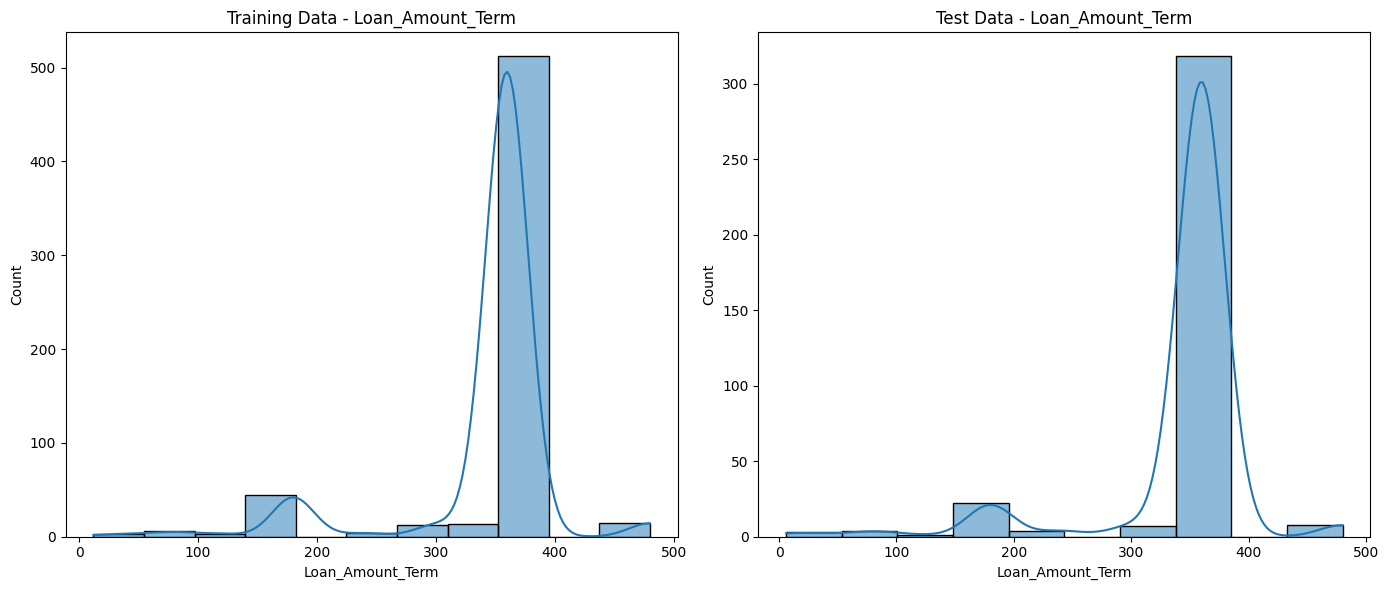

In [19]:
plot_displot(df_train, df_test, 'Loan_Amount_Term')

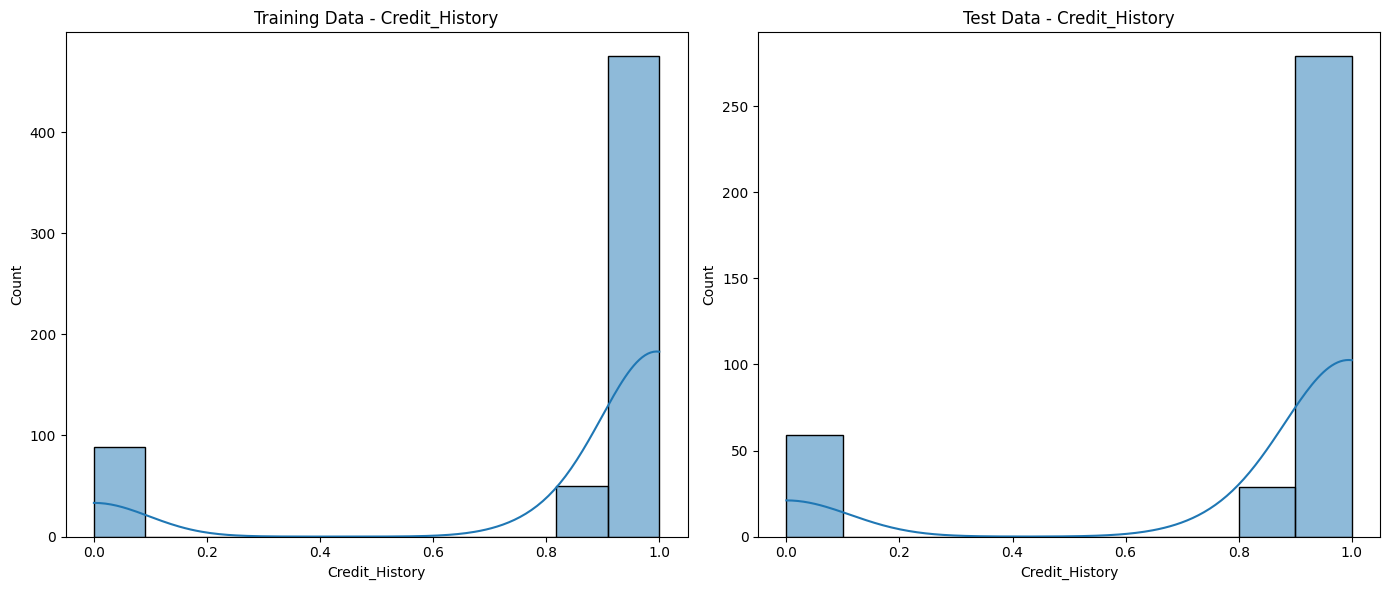

In [20]:
plot_displot(df_train, df_test, 'Credit_History')

## Tạo cột dữ liệu mới (Feature engineering) 

### Total income

In [21]:
def create_total(df):
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    return df

In [22]:
df_train = create_total(df_train)
df_test = create_total(df_test)
print(df_train['Total_Income'])
print("========================")
print(df_test['Total_Income'])

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64
0      5720
1      4576
2      6800
3      4886
4      3276
       ... 
362    5786
363    4867
364    5243
365    7393
366    9200
Name: Total_Income, Length: 367, dtype: int64


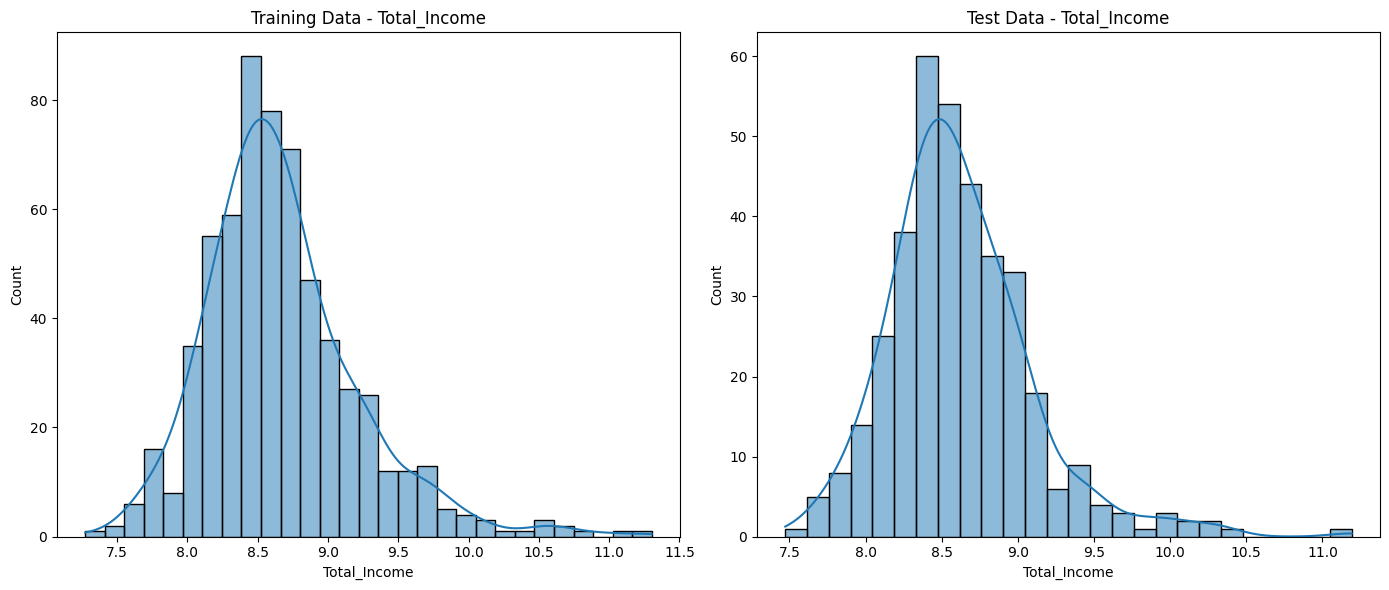

In [23]:
plot_displot(df_train,df_test,'Total_Income',with_log = True)

In [24]:
# Bỏ cột thừa
def drop_columns(df, column_names):
    column_names = [col for col in column_names if col in df.columns]
    return df.drop(column_names, axis=1)

df_train = drop_columns(df_train, ['ApplicantIncome', 'CoapplicantIncome','Loan_ID'])
df_test = drop_columns(df_test, ['ApplicantIncome', 'CoapplicantIncome','Loan_ID'])

## Ma trận tương quan

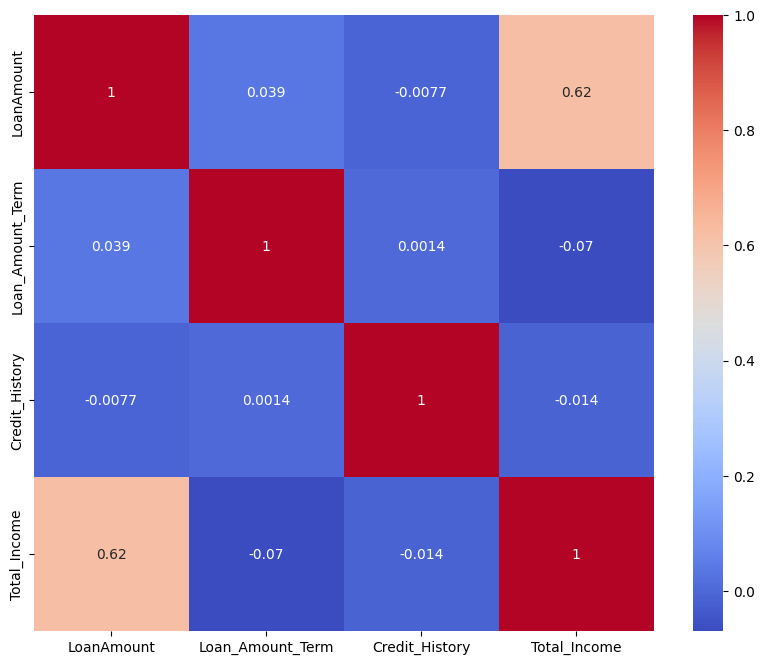

In [25]:
def draw_corr(df):
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

draw_corr(df_train)

In [26]:
df_train.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
431,Male,No,0,Graduate,No,105.000000,360.0,0.000000,Rural,N,6500.0
75,Male,No,0,Graduate,No,113.000000,480.0,1.000000,Urban,N,3750.0
349,Male,Yes,0,Graduate,No,187.000000,360.0,1.000000,Rural,Y,8875.0
284,Male,Yes,0,Graduate,No,146.412162,360.0,1.000000,Rural,N,20667.0
526,Male,Yes,0,Graduate,No,110.000000,360.0,1.000000,Semiurban,Y,3775.0
529,Male,No,0,Not Graduate,No,130.000000,360.0,1.000000,Semiurban,Y,6783.0
479,Male,Yes,2,Graduate,No,146.412162,360.0,1.000000,Urban,N,4550.0
530,Male,Yes,0,Graduate,No,216.000000,360.0,0.842199,Rural,Y,6525.0
414,Female,Yes,0,Not Graduate,No,178.000000,360.0,0.000000,Semiurban,N,5386.0
108,Male,Yes,2,Graduate,No,216.000000,360.0,0.000000,Urban,N,7400.0


# Label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
def transform(df):
    cols = df.select_dtypes(include='object')
    lab = LabelEncoder()
    
    for col in cols:
        df[col] = lab.fit_transform(df[col])
transform(df_train)
transform(df_test)

# Train test split

In [28]:
X = drop_columns(df_train,['Loan_Status'])
y = df_train['Loan_Status']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

# Train Model

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
def classify(model,x,y):
    x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
    model.fit(x_train,y_train)
    print("Score:",model.score(x_test,y_test)*100)
    
    val_score = cross_val_score(model,x,y,cv=5)
    print('Cross validation:',np.mean(val_score)*100)

## Hồi quy logistic

In [32]:
LR_model = LogisticRegression()
classify(LR_model,X,y)

Score: 77.27272727272727
Cross validation: 80.29321604691455


## Cây quyết định

In [33]:
DT_model = DecisionTreeClassifier()
classify(DT_model,X,y)

Score: 68.83116883116884
Cross validation: 69.70944955351193


## Naive Bayes Classifiers 

In [34]:
NBC_model = GaussianNB()
classify(NBC_model,X,y)

Score: 77.92207792207793
Cross validation: 79.64280954284952


## KNN

In [35]:
KNN_model = KNeighborsClassifier()
classify(KNN_model,X,y)

Score: 54.54545454545454
Cross validation: 60.75036652005864


## SVM

In [36]:
svm_model = SVC()
classify(svm_model,X,y)

Score: 64.93506493506493
Cross validation: 68.40330534452886


# Confusion matrix

In [37]:
# Chọn Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[21, 33],
       [ 2, 98]])

<Axes: >

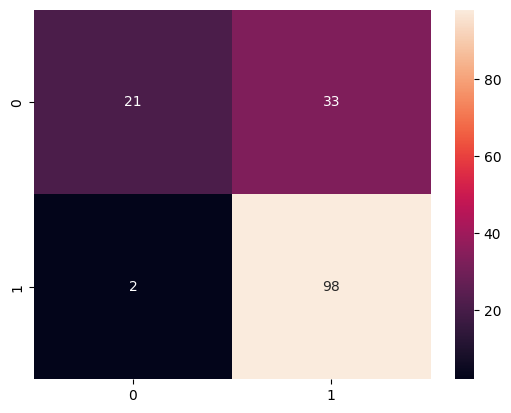

In [39]:
sns.heatmap(cm,annot=True)